In [102]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Template 01

## Moons and Decision boundary

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## Import Statements

In [103]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [104]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed=RANDOM_STATE)
# Hyperparameters
TEST_SIZE  = 0.2 # Size of test data
NOISE = 0.2
EPOCHS  = 2001
ALPHA =  0.1
N_SAMPLE = 1000


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def fn_plot_decision_boundary(X: np.ndarray, y :np.ndarray, model, pred_func):
    """
    Plots the decision boundary for a classification model.

    Args:
        X: The input features (numpy array, expected shape (m, 2)).
        y: The true labels (numpy array).
        model: A dictionary containing the trained weights and biases (W1, W2, B1, B2).
        pred_func: A function that takes the model and a feature array (XX) 
                   and returns the class predictions (0 or 1).
    """
    # NOTE: The weights retrieval 'model.we' was incorrect and is removed.
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 0.5 # Increased padding for better visualization
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # NOTE: The line 'XX = np.hstack((XX, np.ones((XX.shape[0], 1))))' is removed.
    # The bias term is handled internally by the neural network's forward propagation 
    # (z1 = X.dot(w1) + b1), so the input data (XX) shouldn't be augmented with a column of ones.

    # Make predictions for the entire mesh grid
    # The pred_func should handle the forward pass through the model and return binary predictions.
    y_p = pred_func(model, XX) 
    
    # Reshape predictions to match the original mesh grid dimensions (xx.shape)
    # y_p is expected to be a 1D array of predictions (0 or 1).
    Z = np.array(y_p).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    # Use 'coolwarm' or 'bwr' for binary classification. 'Purples' is usually for single-class density.
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm) 
    
    # Scatter plot of the actual data points, colored by their true class labels
    # Use 'y' for the color (true label) instead of X[:, 2] (which might not exist or be the label).
    ax.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=40, edgecolor='k', cmap=plt.cm.coolwarm) 
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('Feature 1')  
    ax.set_ylabel('Feature 2') 
    
    # Display the final plot
    plt.show()

# NOTE: You will need to define the 'pred_func' (e.g., predict) and import
# 'numpy' as 'np' and 'matplotlib.pyplot' as 'plt' for this function to run.

In [106]:
X,y = make_moons(n_samples=N_SAMPLE,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [107]:
X[:5], y[:5]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604]]),
 array([1, 1, 1, 1, 0], dtype=int64))

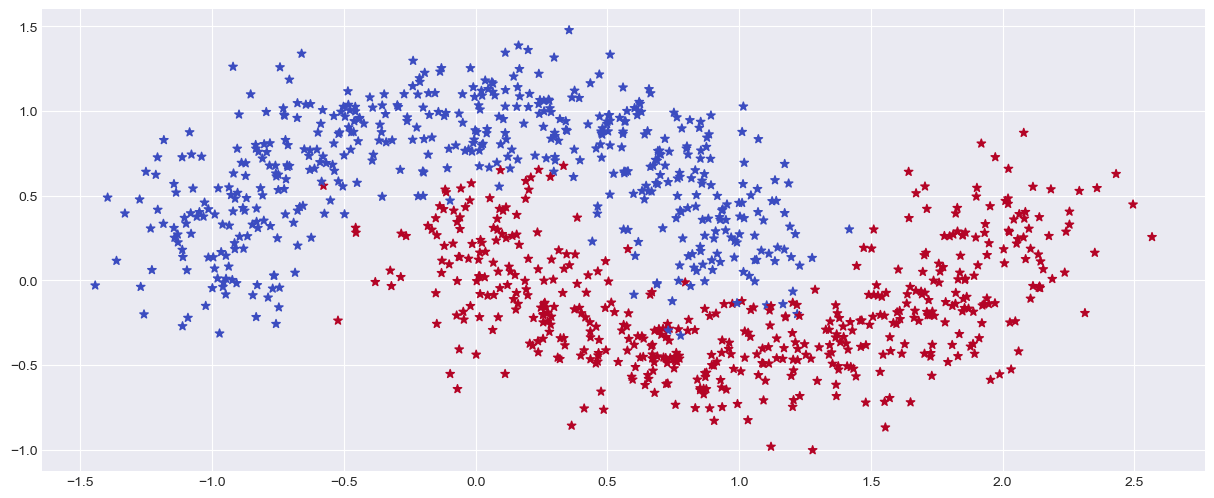

In [108]:
plt.scatter(X[:,0],X[:,1],s=40,c=y,marker="*",cmap=CMAP)


In [109]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y

data_df.head()


,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [110]:
y = pd.get_dummies(y).to_numpy()

In [111]:
sc = StandardScaler()

In [112]:
X_train, X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=TEST_SIZE,random_state=RANDOM_STATE)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [113]:
def fn_softmax(z):
    exp_Score = np.exp(z - np.max(z))
    return exp_Score / np.sum(exp_Score,axis = 1,keepdims=True)

In [114]:
sm = fn_softmax(np.asarray([[-1.0,0,1.0],
                            [-10,0,-8]]))
sm.sum(axis=1)

array([1., 1.])

In [115]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2




In [116]:
fn_activ(np.asarray([[-1.,0,1.0],[-np.inf,0,np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [117]:
def predict(model, X_p):
    w1 = model['W1']
    w2 = model['W2']
    w3 = model['W3']
    w4 = model['W4']
    w5 = model['W5']
   

    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    z1 = X_p.dot(w1) + b1  # aggregation
    a1 = fn_activ(z1)  # activation

    # layer op
    z2 = a1.dot(w2) + b2  # aggregation
    a2 = fn_activ(z2)  # activation


    z3 = a2.dot(w3) + b3  # aggregation
    a3 = fn_activ(z3)  # activation

    z4 = a3.dot(w4) + b4  # aggregation
    a4 = fn_activ(z4)  # activation

    z5 = a4.dot(w5) + b5  # aggregation
    a5 = fn_softmax(z5)

    return a5.argmax(axis=1)


  


In [118]:
def calculate_loss(model, X_l, y_l):
    w1 = model['W1']
    w2 = model['W2']
    w3 = model['W3']
    w4 = model['W4']
    w5 = model['W5']
   

    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    m = X_l.shape[0]
    
    z1 = X_l.dot(w1) + b1  # aggregation
    a1 = fn_activ(z1)  # activation

    # layer op
    z2 = a1.dot(w2) + b2  # aggregation
    a2 = fn_activ(z2)  # activation


    z3 = a2.dot(w3) + b3  # aggregation
    a3 = fn_activ(z3)  # activation

    z4 = a3.dot(w4) + b4  # aggregation
    a4 = fn_activ(z4)  # activation

    z5 = a4.dot(w5) + b5  # aggregation
    a5 = fn_softmax(z5)  # activation

    data_loss = -(y_l * np.log(a5) + (1-y_l) * np.log(1-a5)).sum()
    
    return data_loss / m

    

In [119]:
# weights =  np.array([0.1,2.0,1.0])
# predict(data_df.loc[0].to_numpy(), weights)

In [120]:
def build_model(param,X_tr,y_tr,X_ts,y_ts,alpha, n_epochs):
    m = X_tr.shape[0]
    nn_output_dim = y.shape[1]
    w1 = rng.random((param['h_dim'][0], param['h_dim'][1])) / np.sqrt(param['h_dim'][0])
    w2 =  rng.random((param['h_dim'][1], param['h_dim'][2])) / np.sqrt(param['h_dim'][1])
    w3 =  rng.random((param['h_dim'][2], param['h_dim'][3])) / np.sqrt(param['h_dim'][2])
    w4 =  rng.random((param['h_dim'][3], param['h_dim'][4])) / np.sqrt(param['h_dim'][3])
    w5 =  rng.random((param['h_dim'][4], param['h_dim'][5])) / np.sqrt(param['h_dim'][4])


    b1 = np.zeros((1, param['h_dim'][1]))
    b2 = np.zeros((1, param['h_dim'][2]))
    b3 = np.zeros((1, param['h_dim'][3]))
    b4 = np.zeros((1, param['h_dim'][4]))
    b5 = np.zeros((1, param['h_dim'][5]))

    loss,tloss, epoch = [], [], []
    model = {"W1": w1,
                "W2": w2,
                "B1": b1,
                "B2": b2}
    for i in range(n_epochs):
        ## Forward prop

        # layer hidden
        z1 = X_tr.dot(w1) + b1  # aggregation
        a1 = fn_activ(z1)  # activation

        # layer op
        z2 = a1.dot(w2) + b2  # aggregation
        a2 = fn_activ(z2)  # activation


        z3 = a2.dot(w3) + b3  # aggregation
        a3 = fn_activ(z3)  # activation

        z4 = a3.dot(w4) + b4  # aggregation
        a4 = fn_activ(z4)  # activation

        z5 = a4.dot(w5) + b5  # aggregation
        a5 = fn_softmax(z5)  # activation

        ## Back_propogation
        # layer 5       
        dz5 = a5 - y_tr
        assert(z5.shape == dz5.shape), f'Shape z5  : {z5.shape} , {dz5.shape}'

        dw5 = (a4.T).dot(dz5)
        assert(w5.shape == dw5.shape), f'Shape w5  : {w5.shape} , {dw5.shape}'

        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert(b5.shape == db5.shape), f'Shape b5  : {b5.shape} , {db5.shape}'

        da4 = dz5.dot(w5.T)
        assert(a4.shape == da4.shape), f'Shape a4  : {a4.shape} , {da4.shape}'


        # layer 4       
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'Shape z4  : {z4.shape} , {dz4.shape}'

        dw4 = (a3.T).dot(dz4)
        assert(w4.shape == dw4.shape), f'Shape w4  : {w4.shape} , {dw4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f'Shape b4  : {b4.shape} , {db4.shape}'

        da3 = dz4.dot(w4.T)
        assert(a3.shape == da3.shape), f'Shape a4  : {a3.shape} , {da3.shape}'



        # layer 3       
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'Shape z3  : {z3.shape} , {dz3.shape}'

        dw3 = (a2.T).dot(dz3)
        assert(w3.shape == dw3.shape), f'Shape w3  : {w3.shape} , {dw3.shape}'

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert(b3.shape == db3.shape), f'Shape b3  : {b3.shape} , {db3.shape}'

        da2 = dz3.dot(w3.T)
        assert(a2.shape == da2.shape), f'Shape a2  : {a2.shape} , {da2.shape}'


        # layer 2       
        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'Shape z2  : {z2.shape} , {dz2.shape}'

        dw2 = (a1.T).dot(dz2)
        assert(w2.shape == dw2.shape), f'Shape w3  : {w2.shape} , {dw2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f'Shape b3  : {b2.shape} , {db2.shape}'

        da1 = dz2.dot(w2.T)
        assert(a1.shape == da1.shape), f'Shape a2  : {a1.shape} , {da1.shape}'

        # layer1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'Shape z1  : {z1.shape} , {dz1.shape}'
        dw1 = (X_tr.T).dot(dz1)
        assert(dw1.shape == w1.shape), f'Shape dw1  : {w1.shape} , {dw1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(db1.shape == b1.shape), f'Shape db1 : {db1.shape} , {b1.shape}'

        # Parameter updates
        w1 -= (alpha * dw1 / m)
        b1 -= (alpha * db1 / m)
        w2 -= (alpha * dw2 / m)
        b2 -= (alpha * db2 / m)
        w3 -= (alpha * dw3 / m)
        b3 -= (alpha * db3 / m)
        w4 -= (alpha * dw4 / m)
        b4 -= (alpha * db4 / m)
        w5 -= (alpha * dw5 / m)
        b5 -= (alpha * db5 / m)

        model = {"W1": w1,'b1':b1,
                 "W2": w2,'b2':b2,
                 "W3": w3,'b3':b3,
                 "W4": w4,'b4':b4,
                 "W5": w5,'b5':b5,
                 }
        

        cur_loss = calculate_loss(model, X_tr, y_tr)
        curr_ts_loss = calculate_loss(model,X_ts,y_ts)
        epoch.append(i)
        loss.append(cur_loss)
        tloss.append(curr_ts_loss)

        if not i % 1000 == 0:
            
            print(f"epoch - {i} : Loss - {cur_loss:.4f}")

    loss_hist['epoch'] = epoch
    loss_hist["loss"] = loss
    loss_hist["test_loss"] = tloss
    
    return model



In [121]:
# y_train = y_train.reshape(-1,1)
loss_hist = {}
param = {}
param['h_dim'] = [X_train.shape[1],5,5,4,3,y_train.shape[1]]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [122]:
param

{'h_dim': [2, 5, 5, 4, 3, 2]}

In [123]:
model = build_model(param,X_train,y_train,X_test,y_test,alpha= ALPHA, n_epochs= EPOCHS)
# model["W1"].shape, model["W2"].shape, model["B1"].shape, model["B2"].shape

epoch - 1 : Loss - 1.3842
epoch - 2 : Loss - 1.3793
epoch - 3 : Loss - 1.3745
epoch - 4 : Loss - 1.3700
epoch - 5 : Loss - 1.3655
epoch - 6 : Loss - 1.3611
epoch - 7 : Loss - 1.3567
epoch - 8 : Loss - 1.3524
epoch - 9 : Loss - 1.3480
epoch - 10 : Loss - 1.3436
epoch - 11 : Loss - 1.3392
epoch - 12 : Loss - 1.3347
epoch - 13 : Loss - 1.3302
epoch - 14 : Loss - 1.3255
epoch - 15 : Loss - 1.3207
epoch - 16 : Loss - 1.3158
epoch - 17 : Loss - 1.3108
epoch - 18 : Loss - 1.3055
epoch - 19 : Loss - 1.3001
epoch - 20 : Loss - 1.2946
epoch - 21 : Loss - 1.2888
epoch - 22 : Loss - 1.2828
epoch - 23 : Loss - 1.2766
epoch - 24 : Loss - 1.2702
epoch - 25 : Loss - 1.2636
epoch - 26 : Loss - 1.2567
epoch - 27 : Loss - 1.2496
epoch - 28 : Loss - 1.2423
epoch - 29 : Loss - 1.2347
epoch - 30 : Loss - 1.2269
epoch - 31 : Loss - 1.2188
epoch - 32 : Loss - 1.2105
epoch - 33 : Loss - 1.2019
epoch - 34 : Loss - 1.1931
epoch - 35 : Loss - 1.1841
epoch - 36 : Loss - 1.1749
epoch - 37 : Loss - 1.1654
epoch - 38

In [124]:
model

{'W1': array([[-0.34451568, -0.55861136,  2.06115776,  0.4595901 , -0.64552739],
        [ 0.23700069,  0.21173103, -0.05645699, -0.12702737,  0.2340568 ]]),
 'b1': array([[-0.1803208 , -0.04544082,  0.0258093 , -0.06669747, -0.02942982]]),
 'W2': array([[ 0.08706534,  0.16039501,  0.15589649,  0.26749328,  0.06844754],
        [ 0.24798938,  0.35090491,  0.24952091,  0.45348216,  0.44978945],
        [ 0.58805573,  0.70601065,  0.73836821,  0.56361979,  0.60004465],
        [-0.18996201, -0.17293728, -0.41371423, -0.16280065, -0.05779959],
        [ 0.57451962,  0.74457109,  0.52822989,  0.33852958,  0.51506577]]),
 'b2': array([[ 0.0134902 ,  0.01965229,  0.03124155, -0.00339838,  0.00833872]]),
 'W3': array([[0.39926451, 0.22884336, 0.46713592, 0.3795937 ],
        [0.63339875, 0.37165292, 0.63069334, 0.60410731],
        [0.45104561, 0.54767338, 0.61417072, 0.44968657],
        [0.38390277, 0.42902465, 0.23753431, 0.29907802],
        [0.2451908 , 0.47928957, 0.47612926, 0.51998837

In [125]:
loss_df = pd.DataFrame(loss_hist)
loss_df

,epoch,loss,test_loss
0,0,1.389294,1.389202
1,1,1.384172,1.384601
2,2,1.379268,1.380217
3,3,1.374541,1.376009
4,4,1.369953,1.371940
...,...,...,...
1996,1996,0.160714,0.096425
1997,1997,0.160763,0.104545
1998,1998,0.160711,0.096423
1999,1999,0.160760,0.104546


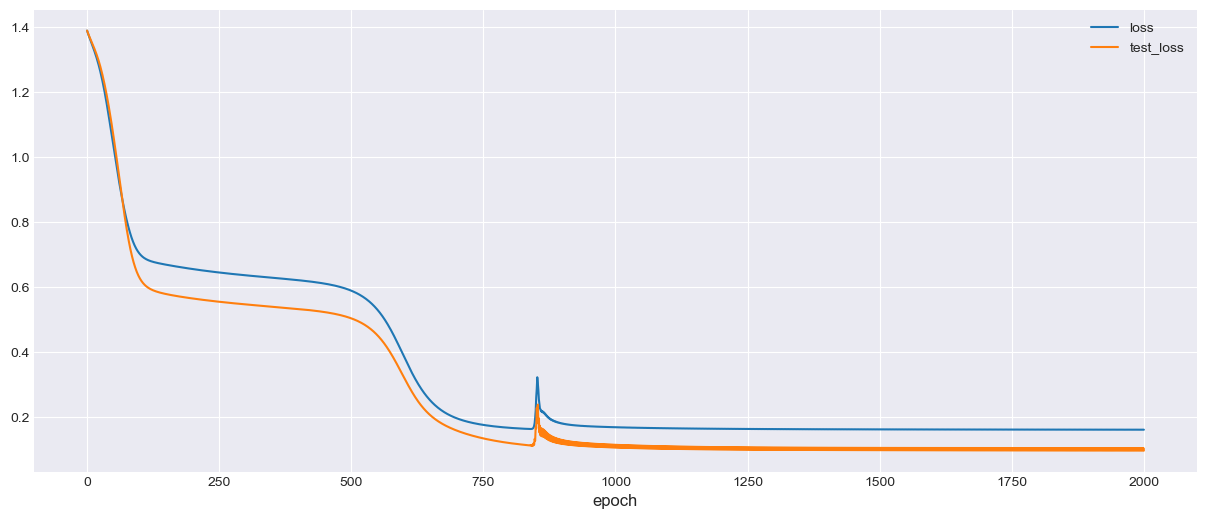

In [126]:

loss_df.plot(x = 'epoch', y = ['loss','test_loss'])
plt.show()

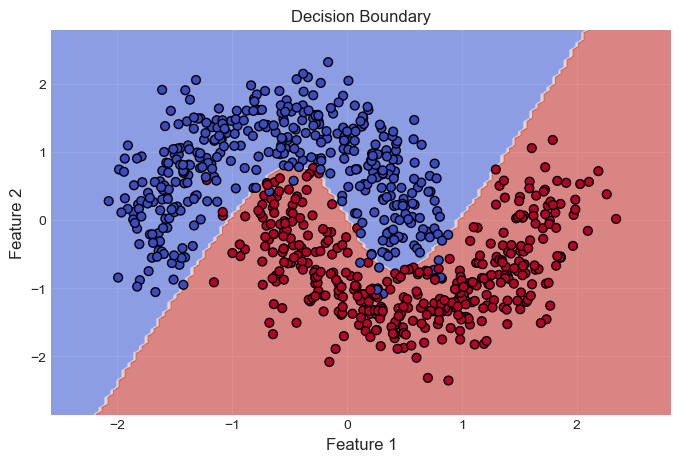

In [127]:
fn_plot_decision_boundary(X_train, y_train.argmax(axis=1), model, predict)